In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
import nltk
import spacy
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS
# STOP_WORDS

In [6]:
text_file = 'text.txt'

In [7]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/in-
[nltk_data]     nikhil.mane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
with open(text_file) as f:
    text = f.readlines()
    
print(type(text), len(text))
text = ' '.join(text)
text

<class 'list'> 71


"Namaskar, my dear countrymen!\n \n Today is the holy festival of Dev-Deepawali. Today is also the holy festival of Prakash Purab of Guru Nanak Dev ji. I extend warm greetings to all the people of the world and to all the countrymen on this holy festival. It is also very gratifying that the Kartarpur Sahib Corridor has now reopened after a gap of one-and-a-half years.\n \n Friends,\n \n Guru Nanak ji has said: 'विच्\u200dच दुनिया सेव कमाइए ता दरगाह बैसन पाइए'\n \n That is, life becomes meaningful only by adopting the path of service. Our government is engaged in making the life of the countrymen easier with this spirit of service. India is making every effort to fulfill the dreams of many generations which wanted them to come true.  \n \n Friends,\n \n I have seen and experienced the problems of farmers very closely in my public life of five decades. Therefore, we gave topmost priority to development of agriculture and welfare of farmers when the country gave me an opportunity to serve

In [38]:
tokenized_sent=sent_tokenize(text)
print(tokenized_sent[0:3])
print(f"Total Sentences in the text = {len(tokenized_sent)}")

['Namaskar, my dear countrymen!', 'Today is the holy festival of Dev-Deepawali.', 'Today is also the holy festival of Prakash Purab of Guru Nanak Dev ji.']
Total Sentences in the text = 80


In [96]:
len(text)

8152

In [28]:
tokenized_word=word_tokenize(text)
print(tokenized_word[0:10])
print(f"Total Sentences in the text = {len(tokenized_word)}")

['Namaskar', ',', 'my', 'dear', 'countrymen', '!', 'Today', 'is', 'the', 'holy']
Total Sentences in the text = 1496


In [31]:
fdist = FreqDist(tokenized_word)
print(fdist, fdist.most_common(5))

<FreqDist with 538 samples and 1496 outcomes> [('the', 95), ('.', 76), ('of', 63), (',', 58), ('to', 43)]


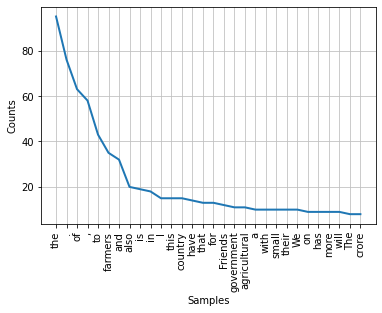

In [33]:
fdist.plot(30,cumulative=False)
plt.show()

In [92]:
stop_words=set(stopwords.words("english"))
stop_words = stop_words.union(STOP_WORDS)
print(stop_words)

{'someone', 'whenever', '’s', "hasn't", 'still', 'then', 'anyhow', 'also', 'towards', 'herein', "won't", "mustn't", 'won', 'haven', 'behind', 'am', 've', 'empty', 'either', 'was', 'meanwhile', 'others', 'can', 're', 'among', 'twenty', 'nevertheless', 'ten', 'amongst', 'mightn', 'himself', 'done', 'out', 'part', 'sometimes', 'whereas', 'throughout', 'sixty', 'mostly', 'almost', '’m', 'wouldn', "you'd", 'over', '‘ve', 'anywhere', 'n‘t', 'anyone', 'nowhere', 'under', 'may', 'beyond', 'much', 'having', 'again', 'often', "aren't", 'those', 'about', 'top', 'just', 'wasn', "'ve", 'y', 'serious', 'whereafter', 'hereby', 'never', 'isn', 'thereafter', 'myself', 'mustn', 'between', "mightn't", 'another', 'their', 'down', 'why', 'next', 'our', 'front', 'until', "should've", 'four', 'whole', 'one', 'whether', 'had', "you're", 'very', 'have', 'go', 'call', 'her', 'across', 'doesn', 'perhaps', 'five', 'put', 'already', 'take', 'therefore', 'thence', '’ll', 'eleven', 'nor', 'while', 'because', 'does',

In [87]:
filtered_text=[]
for w in tokenized_word[0:10]:
    print(w)
    if w not in stop_words:
        filtered_text.append(w)
# print("Tokenized Sentence:",tokenized_sent[0:2])
# print("Filterd Sentence:",filtered_sent[0:2])
filtered_text

Namaskar
,
my
dear
countrymen
!
Today
is
the
holy


['Namaskar', ',', 'dear', 'countrymen', '!', 'Today', 'holy']

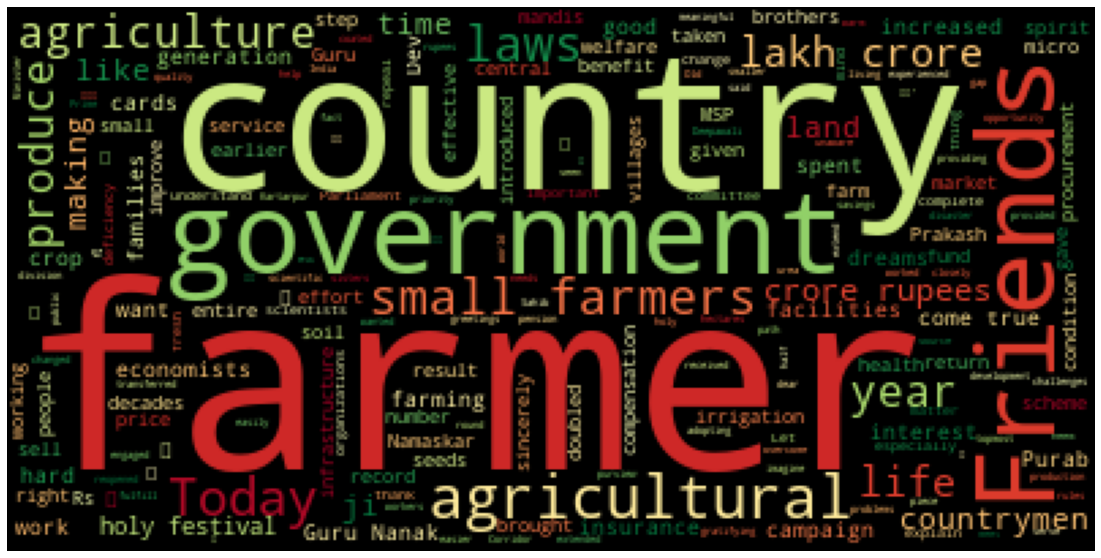

In [93]:
wc = WordCloud(background_color='black', colormap='RdYlGn', stopwords=stop_words).generate_from_text(text)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()


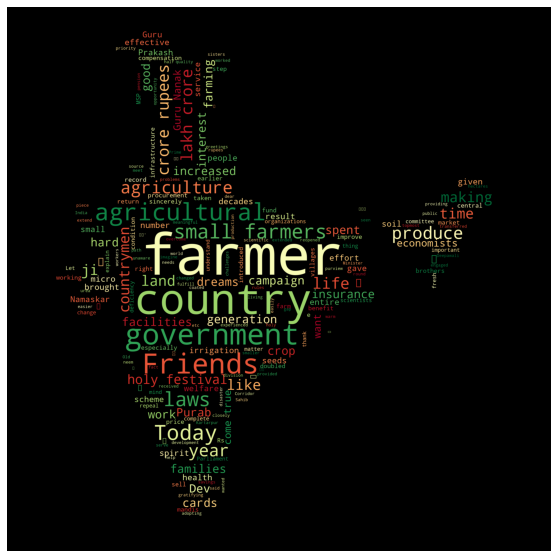

In [95]:
mask = np.array(Image.open('./india_map.jpeg'))
mask
wc = WordCloud(scale=3,background_color='black', stopwords=stop_words,
               colormap='RdYlGn', 
               mask=mask, 
               collocations=True).generate_from_text(text)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()
